# Arbres binaires de recherche

In [2]:
from binary_tree import BinaryTree as BT
VIDE = BT()
import graphviz
from IPython.display import display
def show_tree(arbre):
    display(graphviz.Source(arbre.to_dot()))

## Définition

Un *arbre binaire de recherche* (en abrégé ABR) est

* soit l'arbre vide ;
* soit un arbre binaire tel que
  * ses deux sous-arbres sont des ABR ;
  * tous les nœuds de son sous-arbre gauche ont des valeurs inférieures ou égales à la valeur du nœud racine ;
  * et tous les nœuds de son sous-arbre droit ont des valeurs supérieures ou égales à la valeur du nœud racine.

**Exemple**

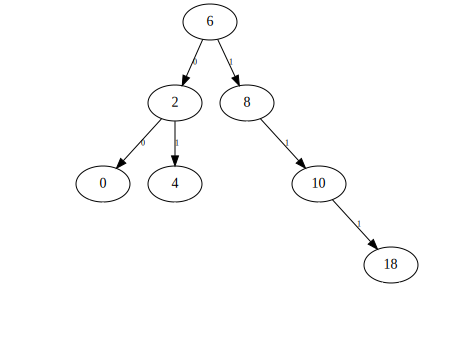

In [3]:
ab1 = BT(6, BT(2, BT(0, VIDE, VIDE), BT(4, VIDE, VIDE)), BT(8, VIDE, BT(10, VIDE, BT(18, VIDE, VIDE))))
show_tree(ab1)

L'arbre `ab1` construit ci-dessus est un ABR.

**Contre exemples**

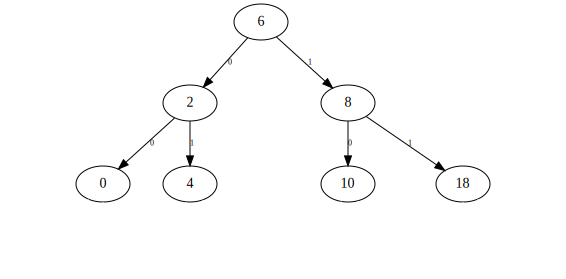

In [4]:
ab2 = BT(6, BT(2, BT(0, VIDE, VIDE), BT(4, VIDE, VIDE)), BT(8, BT(10, VIDE, VIDE), BT(18, VIDE, VIDE)))
show_tree(ab2)

Mais l'arbre `ab2` défini ci-dessous n'est pas un ABR car son sous-arbre droit n'en est pas un (la valeur du fils gauche de la racine du sous-arbre droit de `ab2` est strictement plus grande que celle de la racine de ce sous-arbre).

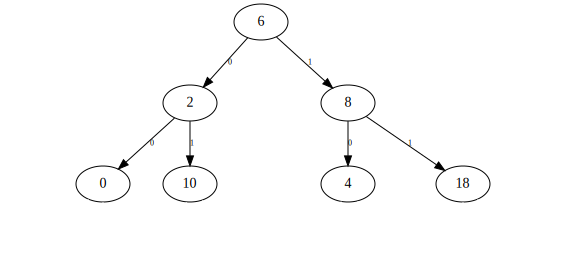

In [5]:
ab3 = BT(6, BT(2, BT(0, VIDE, VIDE), BT(10, VIDE, VIDE)), BT(8, BT(4,VIDE, VIDE), BT(18, VIDE, VIDE)))
show_tree(ab3)

Bien que les deux sous-arbres de l'arbre `ab3` soient des ABR, `ab3` n'en est pas un, étant donné que dans le sous-arbre gauche il y a un nœud dont la valeur est plus grande que celle de la racine.

## Un prédicat de reconnaissance des ABR

Il s'agit de tester si un arbre est un ABR. Plus précisément on va réaliser un prédicat dont voici la spécification.

~~~python
def est_abr(arbre):
    '''
    :param arbre: (BinaryTree) l'arbre à tester
    :return: (Bool)
      - True si arbre est un ABR
      - False sinon.
    :CU: aucune
    '''
~~~


Nous allons en donner trois versions.

### Première version

La première version est une traduction quasi littérale de la définition d'un ABR.

In [6]:
def tous_inferieurs(arbre, elt):
    if arbre.is_empty():
        return True
    else:
        return (arbre.get_data() <= elt and
                tous_inferieurs(arbre.get_left_subtree(), elt) and
                tous_inferieurs(arbre.get_right_subtree(), elt)
               )
    
def tous_superieurs(arbre, elt):
    if arbre.is_empty():
        return True
    else:
        return (arbre.get_data() >= elt and
                tous_superieurs(arbre.get_left_subtree(), elt) and
                tous_superieurs(arbre.get_right_subtree(), elt)
               )
    
def est_abr1(arbre):
    if arbre.is_empty():
        return True
    else:
        rac = arbre.get_data()
        sag = arbre.get_left_subtree()
        sad = arbre.get_right_subtree()
        return (est_abr1(sag) and
                est_abr1(sad) and
                tous_inferieurs(sag, rac) and
                tous_superieurs(sad, rac)
               )

In [7]:
(est_abr1(ab1), est_abr1(ab2), est_abr1(ab3))

(True, False, False)

**Coût**

Combien de comparaisons de valeurs de nœuds sont elles effectuées par cette première méthode ?

On note $c_1(a)$ le nombre de comparaisons de valeurs de nœuds pour tester si un arbre binaire $a$ est un ABR avec le prédicat `est_abr1`.

Pour un squelette d'arbre fixé, le nombre de comparaisons est maximal lorsque $a$ est un ABR. Et dans ce cas une traduction de l'algorithme conduit aux équations suivantes :

\begin{align*}
   c_1(a) &= 0 \mbox{ si } |a| \leq 1 \\
   c_1(a) &= c_1(g) + c_1(d) + |a| - 1 \mbox{ si } a=(x, g, d).
\end{align*}

On peut analyser la situation différemment en considérant que lorsqu'un arbre est un ABR, qh'hormis la racine, chacun de ses nœuds est comparé une et une fois avec chacun de ses ascendants. Ainsi un nœud à profondeur $p\leq 1$ est comparé une fois avec chacun de ses $p-1$ ascendants. Et en notant $n(a, p)$ le nombre de nœuds à profondeur $p$ de l'arbre $a$, et $h$ sa hauteur, on peut alors écrire pour un arbre non vide $a$ 

$$ c_1(a) = \sum_{p=1}^{h}(p\times n(a,p)).$$

Par abus de notation, si on désigne $c_1(h)$ le nombre de comparaisons maximal pour un arbre de hauteur $h$, et en tenant compte du fait que $n(a,p)$ est compris entre 1 et $2^p$, on obtient l'encadrement

$$ \sum_{p=1}^{h} p \leq c_1(h) \leq \sum_{p=1}^{h} 2^p\times p,$$
ce qui, tout calcul effectué donne l'encadrement
$$ \frac{h(h+1)}{2} \leq c_1(h) \leq (h-1)\times 2^{h+1} + h + 1.$$
La minoration peut être atteinte pour un arbre ayant 1 seul nœud à chaque profondeur (arbre filiforme), et la majoration lorsque l'abre possède $2^{p}$ nœuds à chaque profondeur (arbre complet). Dans le premier cas l'arbre est de taille $n=h+1$ et le nombre de comparaisons peut s'exprimer en fonction de la taille par
$$ c_1(n) = \frac{n(n-1)}{2} \sim \frac{n^2}{2} \mbox{ (arbre filiforme)},$$
et dans le deuxième cas l'arbre est de taille $n=2^{h+1}-1$, et le nombre de comparaisons peut s'exprimer en fonction de la taille par
$$c_1(n) = n\log_2(n+1) - 2n + 2\log_2(n+1) -2 \sim n\log_2(n) \mbox{ (arbre complet)}.$$

On peut retenir que le nombre de comparaisons effectuées pour tester un arbre de taille $n$ qui est un ABR dépend de la forme de cet arbre mais que dans tous les cas il est compris entre un ordre de grandeur en $\Theta(n\log_2(n))$ dans le meilleur des cas et un ordre de grandeur en $\Theta(n^2)$ dans le pire des cas.

### Deuxième version

On peut tenter d'améliorer l'algorithme de ce prédicat en remplaçant les prédicats `tous_inferieurs` et `tous_supérieurs` par une simple comparaison de la valeur située à la racine avec la plus grande valeur contenue dans le sous-arbre gauche et avec la plus petite valeur du sous-arbre droit. Et ceci en tenant compte de la propriété que dans un ABR non vide 

* le nœud contenant la plus grande valeur est le premier nœud sans fils droit rencontré en partant de la racine ;
* le nœud contenant la plus petite valeur est le premier nœud sans fils gauche rencontré en partant de la racine.

In [8]:
def max_abr(abr):
    sad = abr.get_right_subtree()
    if sad.is_empty():
        return abr.get_data()
    else:
        return max_abr(sad)

def min_abr(abr):
    sag = abr.get_left_subtree()
    if sag.is_empty():
        return abr.get_data()
    else:
        return min_abr(sag)

def est_abr2(arbre):
    if arbre.is_empty():
        return True
    else:
        rac = arbre.get_data()
        sag = arbre.get_left_subtree()
        sad = arbre.get_right_subtree()
        return (est_abr2(sag) and
                est_abr2(sad) and
                (sag.is_empty() or max_abr(sag) <= rac) and
                (sad.is_empty() or min_abr(sad) >= rac)
               )

In [9]:
(est_abr2(ab1), est_abr2(ab2), est_abr2(ab3))

(True, False, False)

**Coût**

Encore une fois, le nombre de comparaisons est maximal pour un arbre $a$ qui est un ABR, et dans ce cas le nombre de comparaisons $c_2(a)$ est déterminé par les équations :
\begin{align*}
  c_2(a) &= 0 \mbox{ si } |a| \leq 1\\
  c_2(a) &= c_2(g) + c_2(d) + k \mbox{ si } a=(x, g, d)
\end{align*}
avec $k=1$ si $a$ n'a qu'un seul sous-arbre non vide, et $k=2$ si les deux sous-arbres sont non vides. 

Encore une fois il est plus simple de regarder les choses globalement, et de constater que la valeur de chaque nœud (sauf les feuilles) est comparée avec celle d'un nœud de chacun des deux sous-arbres si ceux-ci sont tous deux non vides, ou avec celle d'un nœud de l'unique sous-arbre non vide. Autrement dit on a
$$c_2(a) = \sum_{p=0}^{h-1}(n(a,p)\times k),$$
avec $k$ valant 1 ou 2.

Pour un arbre binaire de hauteur $h$ on obtient l'encadrement
$$ \sum_{p=0}^{h-1} (1\times 1) \leq c_2(h) \leq \sum_{p=0}^{h-1} (2^p\times 2),$$
correpondant au cas d'un arbre filiforme pour la minoration (à chaque profondeur un nœud ayant un seul sous-arbre non vide), et au cas d'un arbre complet pour la majoration (à chaque profondeur $2^p$ nœuds ayant deux sous-arbres non vides). Cet encadrement donne, une fois les sommes calculées, 
$$ h \leq c_2(h) \leq 2^{h+1}-2.$$

Exprimés en fonction de la taille $n$ de l'arbre, ces comparaisons deviennent
$$ c_2(n) = n-1,$$
aussi bien pour l'arbre filiforme que pour l'arbre complet.

On retiendra qu'avec cette méthode, le nombre de comparaisons est au maximul en $\Theta(n)$.

### Troisième version

Une autre possibilité de prédicat repose sur la propriété suivante.

Un arbre binaire est un ABR si et seulement si la liste des valeurs de ses nœuds parcourus dans l'ordre infixe est triée.

In [10]:
def ordre_infixe(arbre):
    if arbre.is_empty():
        return []
    else:
        return (ordre_infixe(arbre.get_left_subtree()) + 
                [arbre.get_data()] + 
                ordre_infixe(arbre.get_right_subtree()))

In [11]:
(ordre_infixe(ab1), ordre_infixe(ab2), ordre_infixe(ab3))

([0, 2, 4, 6, 8, 10, 18], [0, 2, 4, 6, 10, 8, 18], [0, 2, 10, 6, 4, 8, 18])

In [12]:
def est_abr3(arbre):
    liste_infixe = ordre_infixe(arbre)
    return all(liste_infixe[i] <= liste_infixe[i+1] for i in range(len(liste_infixe) - 1))

In [13]:
(est_abr3(ab1), est_abr3(ab2), est_abr3(ab3))

(True, False, False)

**Coût**

Avec cette méthode, le nombre de comparaisons de valeurs des nœuds ne dépend que de la taille de l'arbre. Il est compris entre 1 et $n-1$. 
$$1 \leq c_3(n) \leq n - 1.$$

En contrepartie, il faut construire une liste. 

## Construction

In [14]:
def insere(elt, abr):
    if abr.is_empty():
        return BT(elt, VIDE, VIDE)
    else:
        rac = abr.get_data()
        sag = abr.get_left_subtree()
        sad = abr.get_right_subtree()
        if elt <= rac:
            return BT(rac, insere(elt, sag), sad)
        else:
            return BT(rac, sag, insere(elt, sad))

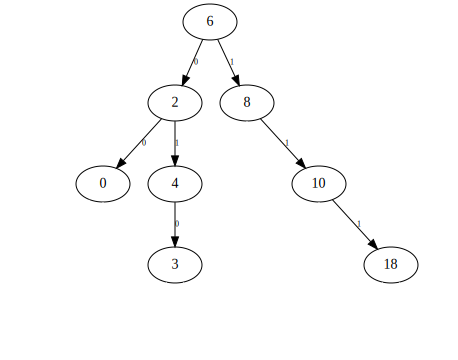

True

In [15]:
ab4 = insere(3, ab1)
show_tree(ab4)
est_abr3(ab4)

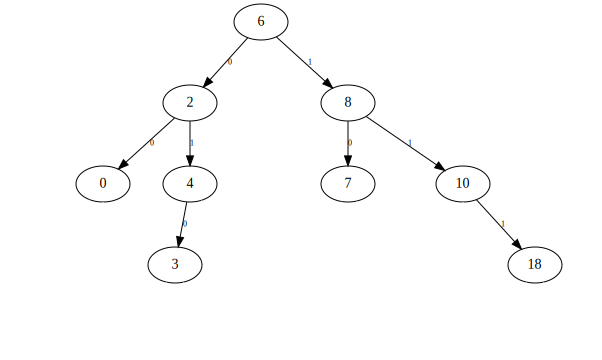

True

In [16]:
ab5 = insere(7, ab4)
show_tree(ab5)
est_abr3(ab5)

In [17]:
def liste_en_abr(liste):
    abr = BT()
    for elt in liste:
        abr = insere(elt, abr)
    return abr

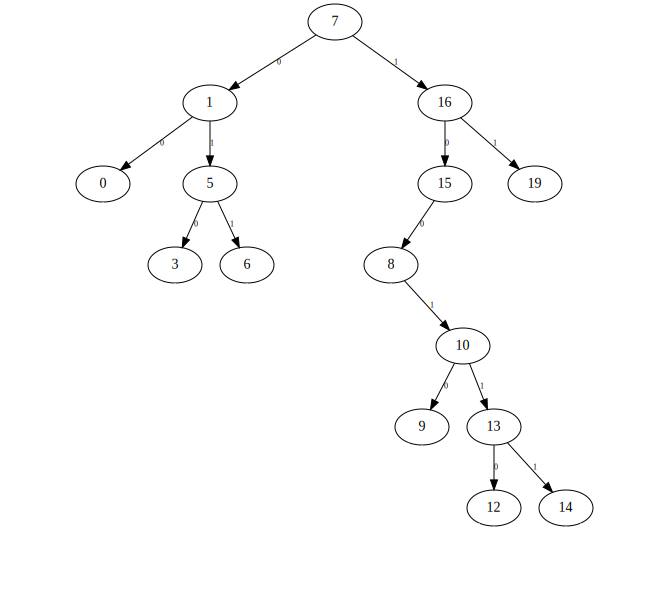

True

In [18]:
ab6 = liste_en_abr([7, 1, 16, 15, 8, 0, 10, 5, 19, 6, 13, 12, 3, 9, 14])
show_tree(ab6)
est_abr3(ab6)

## Recherche

In [19]:
def appartient(elt, abr):
    if abr.is_empty():
        return False
    elif elt == abr.get_data():
        return True
    elif elt <= abr.get_data():
        return appartient(elt, abr.get_left_subtree())
    else:
        return appartient(elt, abr.get_right_subtree())

In [20]:
(appartient(2, ab6), appartient(13, ab6))

(False, True)

## Suppression d'un élément

In [21]:
def supprime(elt, abr):
    if abr.is_empty():
        return VIDE
    else:
        rac = abr.get_data()
        sag = abr.get_left_subtree()
        sad = abr.get_right_subtree()
        if elt < rac:
            return BT(rac, supprime(elt, sag), sad)
        elif elt > rac:
            return BT(rac, sag, supprime(elt, sad))
        else: # elt == rac
            if sag.is_empty():
                return sad
            else:
                elt_max = max_abr(sag)
                return BT(elt_max, supprime(elt_max, sag), sad)

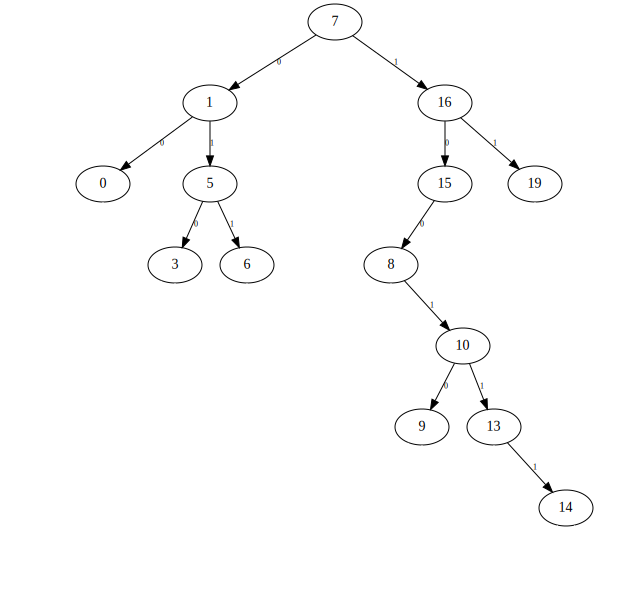

True

In [22]:
ab7 = supprime(12, ab6)
show_tree(ab7)
est_abr3(ab7)

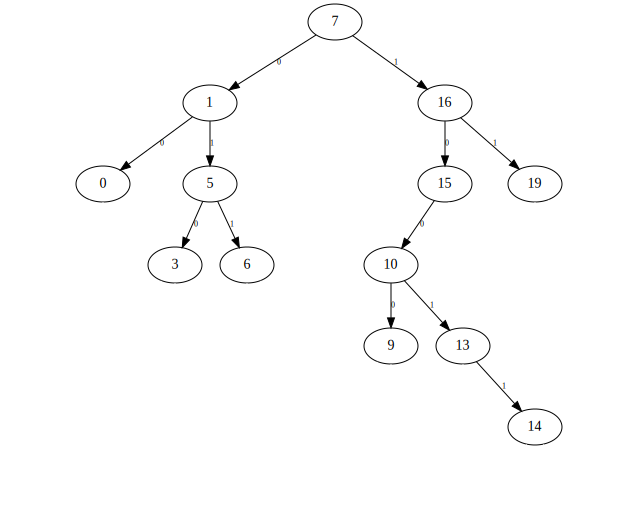

True

In [23]:
ab8 = supprime(8, ab7)
show_tree(ab8)
est_abr3(ab8)

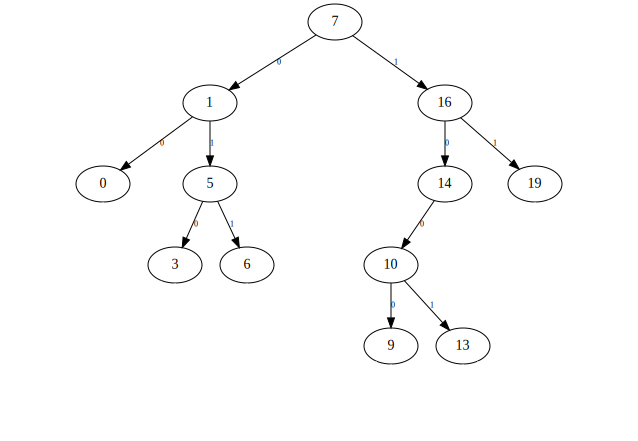

True

In [24]:
ab9 = supprime(15, ab8)
show_tree(ab9)
est_abr3(ab9)

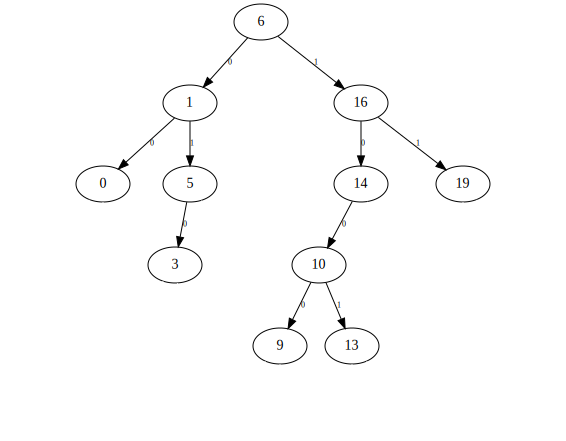

True

In [25]:
ab10 = supprime(7, ab9)
show_tree(ab10)
est_abr3(ab10)

## Hauteur d'un ABR 

### Trois situations bien différentes

In [26]:
l = list(range(15))

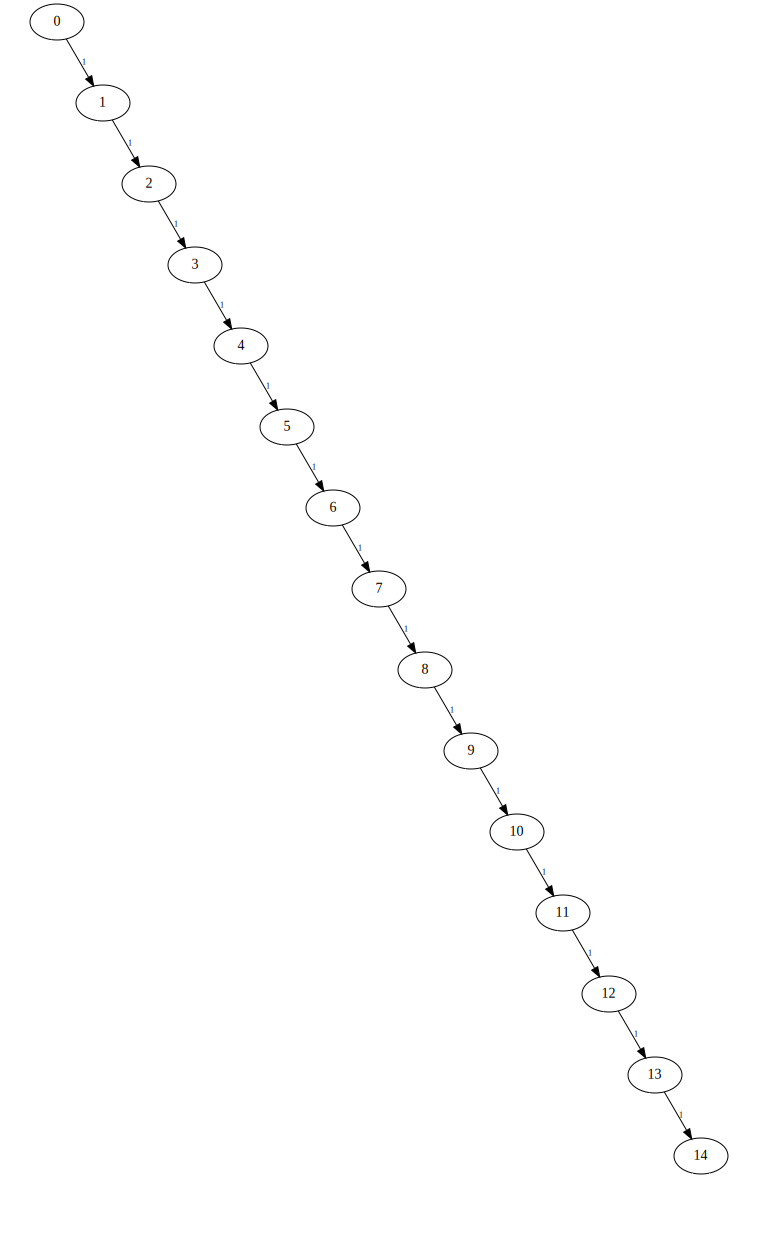

In [27]:
ab11 = liste_en_abr(l)
show_tree(ab11)

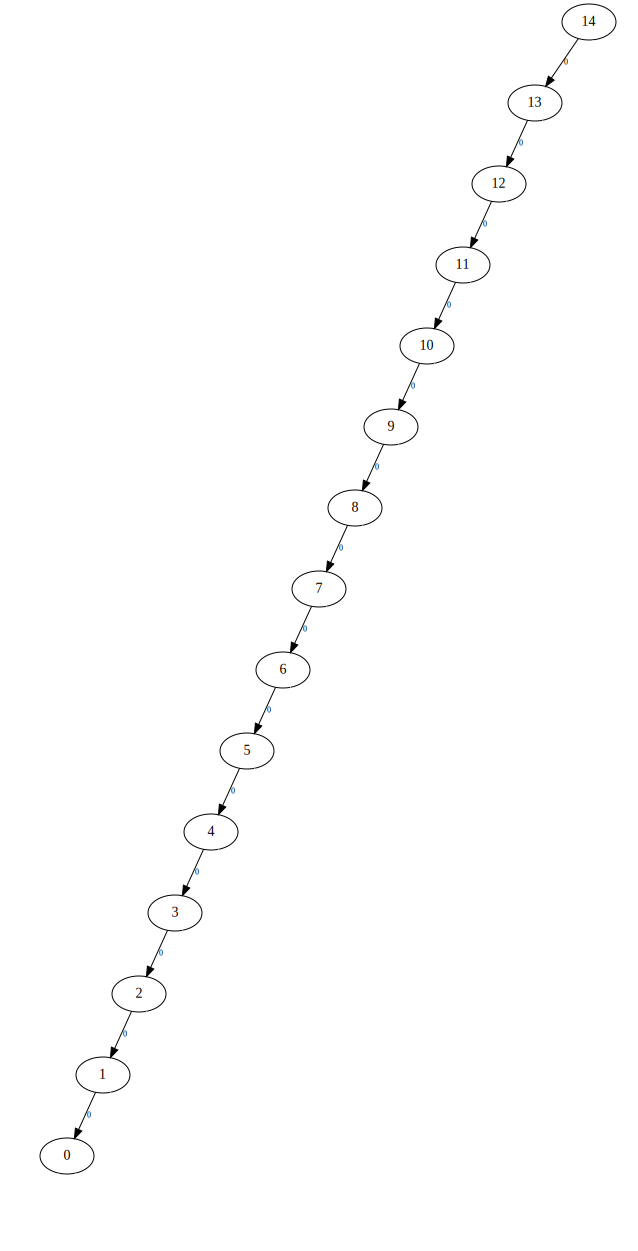

In [28]:
ab12 = liste_en_abr(reversed(l))
show_tree(ab12)

In [29]:
import random
random.shuffle(l)

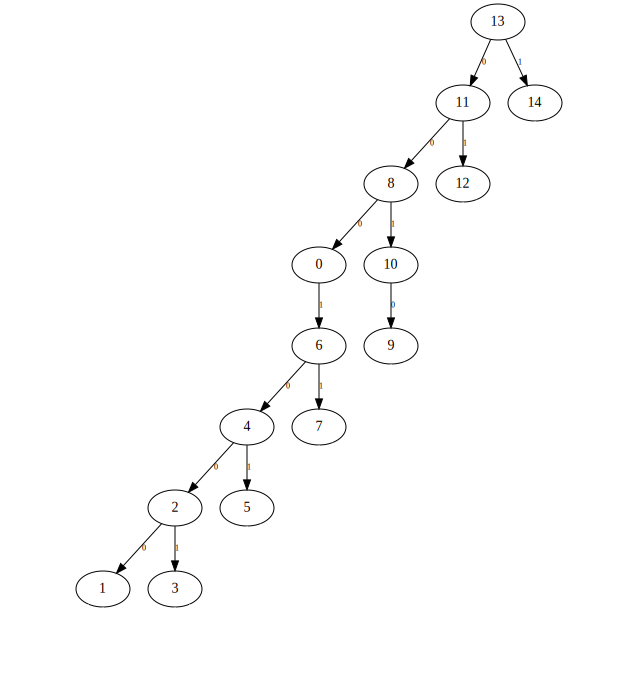

In [30]:
ab13 = liste_en_abr(l)
show_tree(ab13)

### Une étude statistique

In [31]:
# répartition des hauteurs d'ABRs aléatoires d'une taille fixée
TAILLE = 255 # Taille des arbres à produire
TAILLE_ECHANTILLON = 1000 
SEQ = list(range(TAILLE))
hauteurs3 = dict()
for _ in range(TAILLE_ECHANTILLON):
    random.shuffle(SEQ)
    h = liste_en_abr(SEQ).height()
    if h in hauteurs3:
        hauteurs3[h] += 1
    else:
        hauteurs3[h] = 1

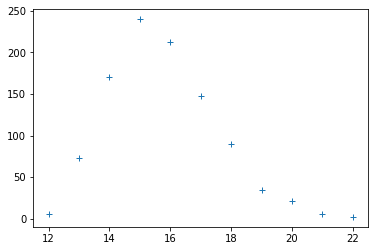

In [32]:
import pylab
pylab.plot([h for h in hauteurs3], [hauteurs3[h] for h in hauteurs3], '+')

### Résultat théorique

La hauteur moyenne d'un ABR de taille $n$ construit aléatoirement en insérant successivement à l'arbre vide $n$ éléments, et en considérant que les $n!$ ordres de ces $n$ éléments sont équiprobables, est en $\Theta(\log(n))$. 

**Remarque** on peut prouver (cf Intro à l'algorithmique de Cormen & al) qu'un équivalent de la hauteur moyenne quand la taille tend vers l'infini est $2(\beta +1)\ln{n}$, avec $\beta$ solution de l'équation $(\ln{\beta} -1)\beta = 2$. Une valeur approchée de $\beta$ est $\beta\approx 4.32$.

# Arbres binaires de recherche équilibrés

Les complexités des principales opérations sur les ABR (recherche, insertion, suppression) sont toutes en $\Theta(h)$. Mais comme la hauteur d'un arbre binaire peut être en égale à sa taille moins un, dans le pire des cas (arbres filiformes) les complexités sont linéaires en la taille et la structure arborescente n'apporte rien par rapport aux structures linéaires.

Il convient donc d'essayer de limiter la hauteur d'un ABR en essayant de faire en sorte qu'elle soit le plus proche possible du logarithme de sa taille afin d'obtenir des opérations de complexité logarithmique.

Plusieurs techniques d'équilibrage (ou plutôt de maintien de l'équilibrage) existent. Nous allons en voir une, celle des arbres rouge-noir.

## Définition des arbres rouge-noir

Un arbre *rouge-noir* est un ABR tel que

1. chaque nœud est soit rouge, soit noir (on ajoute à chaque nœud 1 bit d'information définissant sa couleur) ;
2. si un nœud est rouge, alors ses fils sont noirs ;
3. ses sous-arbres, s'il en a, sont des arbres rouge-noir ;
4. toutes les branches menant de la racine à un sous-arbre vide contiennent le même nombre de nœuds noirs.

**Remarque** il ressort de cette définition que l'arbre vide est un arbre rouge-noir.

Voici un exemple d'arbre rouge-noir.

In [33]:
def colorie(arbre, noeuds):
    '''
    :param arbre: (BinaryTree) 
    :param noeuds: (list ou tuple) une liste de (étiquettes de) nœuds
    :return: (NoneType)
    :side effect: dessine l'arbre en coloriant les nœuds de noeuds en rouge
    '''
    descr = arbre.to_dot()
    for noeud in noeuds:
        descr = descr.replace('label="{:d}"'.format(noeud), 'label="{:d}", color="#FF0000"'.format(noeud))
    display(graphviz.Source(descr))

**Exemple**

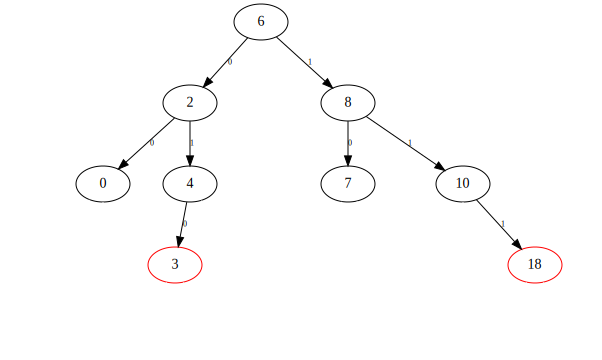

In [34]:
colorie(ab5, (3, 18))

Cet arbre est un arbre rouge-noir :
    
* c'est un ABR ;
* tous ses nœuds sont rouges ou noirs ;
* tout nœud rouge a des fils noirs ;
* tout chemin menant de la racine à un sous-arbre vide a le même nombre de nœuds noirs (ici 3) ;
* les deux sous-arbres gauche et droit sont des arbres rouge-noir.

**Contre-exemple**

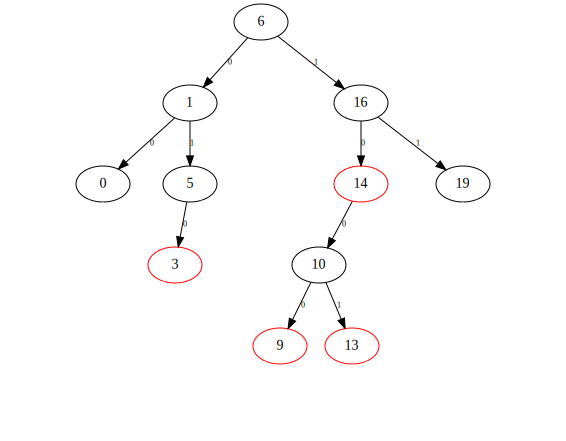

In [35]:
colorie(ab10, (3, 9, 13, 14))

Cet arbre n'est pas rouge-noir car

* les nombres de nœuds noirs sur les chemins menant de la racine à un sous-arbre vide ne sont pas tous égaux ;
* mais aussi car le sous-arbre droit n'est pas rouge-noir.

**Exercices**

1. Colorier de plusieurs façons un squelette d'arbre binaire complet de hauteur 3 (et donc de taille 15).
2. Est-ce que tout squelette d'arbre binaire peut être celui d'un arbre rouge-noir ? Sinon trouver une condition nécessaire pour qu'un squelette soit coloriable ?
3. Si un arbre rouge-noir a sa racine rouge, est-ce que l'arbre obtenu en changeant la couleur de la racine est encore un arbre rouge-noir ? Et l'inverse ?

On appelle *hauteur noire* d'un arbre rouge-noir $a$, et on note $\mathrm{hn}(a)$ le nombre de nœuds noirs sur l'un quelconque des chemins menant de la racine à un sous-arbre vide, sans compter la racine augmenté de 1. On convient que la hauteur noire de l'arbre vide est nulle.

* La hauteur noire d'une feuille, quelque soit sa couleur est 1.
* La hauteur noire de l'arbre rouge-noir donné en exemple ci-dessus est $\mathrm{hn}(ab5) = 3$.

**Lemme**
1. Si $a$ est un arbre rouge-noir, alors
   $$ \mathrm{hn}(a) \geq \frac{\mathrm{h}(a)}{2}.$$
2. Si $a$ est un arbre rouge-noir, alors
   $$ |a| \geq 2^{\mathrm{hn}(a)} - 1.$$
3. Si $a$ est un arbre rouge-noir alors
   $$ \mathrm{h}(a) \leq 2\log_2(n+1).$$

**Preuve**

2. On démontre le point 2 par récurrence sur la hauteur $\mathrm{h}(a)$ de l'arbre $a$.
   
   **Cas de base** $\mathrm{h}(a)=0$. Dans ce cas $a$ est réduit à un seul nœud (une feuille) et $|a| = 1$. Par ailleurs, la hauteur noire d'une feuille vaut 1.    On a bien l'inégalité $|a[\geq 2^{\mathrm{hn}(a)} -1$ voulue (qui est dans ce cas une égalité).
   
   **Hérédité** Supposons que pour tout arbre rouge-noir de hauteur jusqu'à un certain entier $h$, on ait bien l'inégalité voulue. Montrons alors que cette inégalité est encore vérifiée pour un arbre rouge-noir de hauteur $h+1$.
   
   Soit donc $a$ un arbre rouge-noir de hauteur $h+1$. Ses deux sous-arbres s'ils ne sont pas vides sont d'une hauteur au plus égale à $h$, et ce sont des arbres rouge-noir. La hauteur noire de chacun de ces deux sous-arbres ne peut valoir que $\mathrm{hn}(a)$ ou $\mathrm{hn}(a) - 1$ selon les nœuds racines de ces sous-arbres sont rouge ou noir. L'hypothèse de récurrence s'applique à chacun de ces deux sous-arbres, et chacun d'eux a une taille au moins égale à $2^{\mathrm{hn}(a) - 1}-1$. On peut en déduire que la taille de l'arbre $a$ vérifie
   $$ |a| \geq 1 + 2(2^{\mathrm{hn}(a) - 1} - 1) = 2^{\mathrm{hn}(a)} - 1.$$
   Ainsi on a montré que l'inégalité vaut aussi pour les arbres rouge-noir de hauteur $h$.
   
   Par conséquent quelque soit leur hauteur on a bien $|a| \geq 2^{\mathrm{hn}(a)} - 1$.
   
3. Le point 3 se déduit des points 1 et 2. En effet, d'après le point 2 la taille $n$ d'un arbre rouge-noir vérifie l'inégalité
   $$ n \geq 2^{\mathrm{hn}(a)} - 1,$$
   et d'après le point 1 cette inégalité devient
   $$ n \geq 2^{\mathrm{h}(a)/2} - 1.$$
   En passant au logarithme binaire, on obtient l'inégalité voulue
   $$ 2\log_2(n+1) \geq \mathrm{h}(a).$$

**Conséquence**

Les opérations élémentaires sur les ABR s'exécutent en $\Theta(\log n)$ sur des arbres rouge-noir.

Cependant, les opérations d'insertion et de suppression telles qu'elles ont été programmées ne préservent pas la propriété d'être un arbre rouge-noir.